In [ ]:
from nilearn import plotting
from nilearn import image as nli
import numpy as np

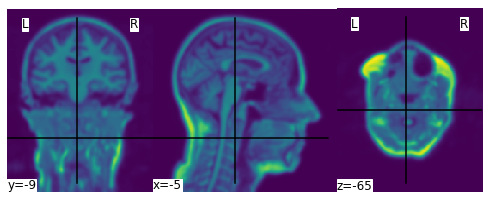

In [ ]:
plotting.plot_img("/content/AD1.nii")

In [ ]:
!pip install nilearn

     |████████████████████████████████| 10.1 MB 21.5 MB/s 


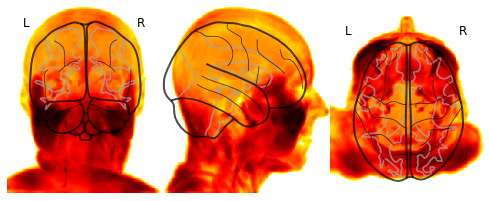

In [ ]:
plotting.plot_glass_brain("AD1.nii")

In [ ]:
bold = nli.load_img("AD1.nii")
bold = bold.slicer[...,:]

In [ ]:
img = nli.mean_img(bold)
plotting.view_img(img, bg_img=img)

In [ ]:
t1 = nli.load_img("AD1.nii")
mean = nli.mean_img(bold)
print([mean.shape, t1.shape])

[(256, 256, 170), (256, 256, 170)]


In [ ]:
resampled_t1 = nli.resample_to_img(t1, mean)
resampled_t1.shape

(256, 256, 170)

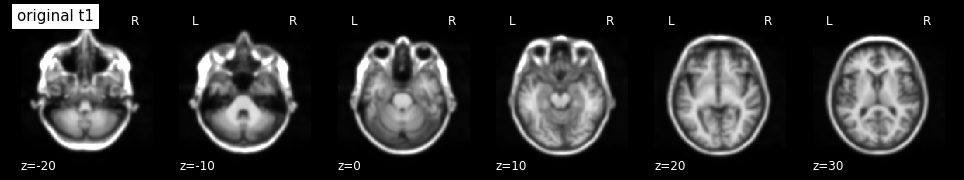

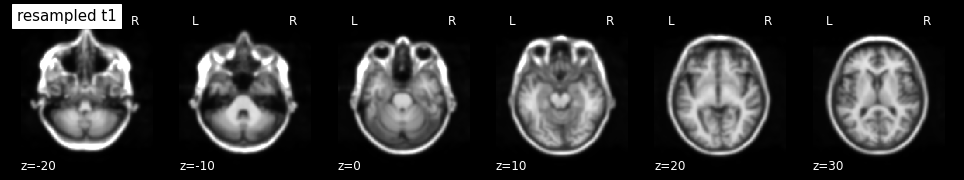

In [ ]:
plotting.plot_anat(t1, title='original t1', display_mode='z', dim=-1,
                   cut_coords=[-20, -10, 0, 10, 20, 30])
plotting.plot_anat(resampled_t1, title='resampled t1', display_mode='z', dim=-1,
                   cut_coords=[-20, -10, 0, 10, 20, 30])

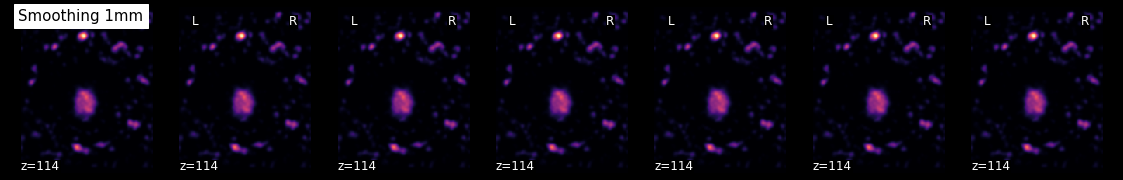

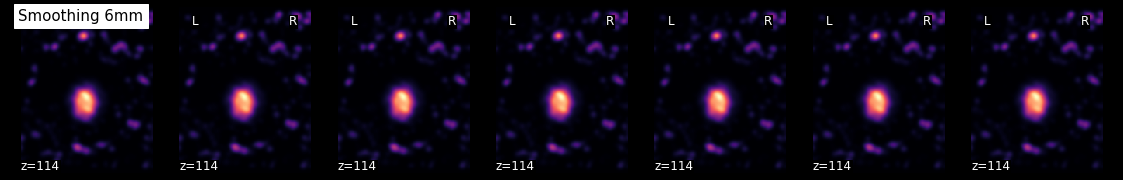

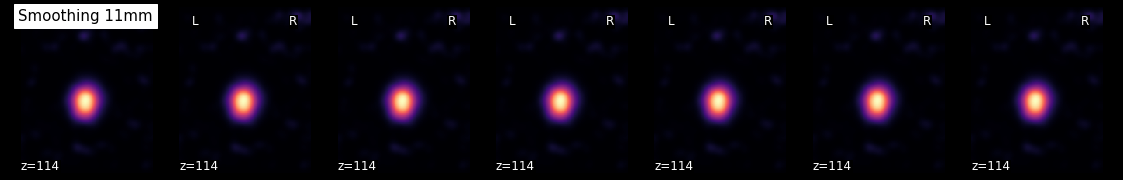

In [ ]:
for i in range(1, 12, 5):
    smoothed_img = nli.smooth_img(mean, i)
    plotting.plot_epi(smoothed_img, title="Smoothing %imm" % i,
                     display_mode='z', cmap='magma')

In [ ]:
TR = bold.header['pixdim'][4]
TR

1.0

In [ ]:
mean = nli.mean_img(bold)
thr = nli.threshold_img(mean, threshold='95%')
plotting.view_img(thr, bg_img=img)

In [ ]:
voxel_size = np.prod(thr.header['pixdim'][1:4])  # Size of 1 voxel in mm^3
voxel_size

1.2173071

In [ ]:
plotting.view_img(mean, threshold=None, bg_img=False)

In [ ]:
t1 = nli.load_img("/content/AD1.nii")

msdl_atlas = fetch_atlas_msdl(t1)

msdl_coords = msdl_atlas.region_coords
n_regions = len(msdl_coords)

print(f'MSDL has {n_regions} ROIs, part of the following networks :\n{np.unique(msdl_atlas.networks)}.')

MSDL has 39 ROIs, part of the following networks :
['Ant IPS' 'Aud' 'Basal' 'Cereb' 'Cing-Ins' 'D Att' 'DMN' 'Dors PCC'
 'L V Att' 'Language' 'Motor' 'Occ post' 'R V Att' 'Salience' 'Striate'
 'Temporal' 'Vis Sec'].


/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays/_axes.py:73: UserWarning: No contour levels were found within the data range.
  **kwargs)


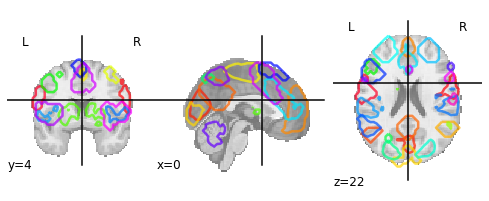

In [ ]:
plotting.plot_prob_atlas(msdl_atlas.maps)

In [ ]:
from nilearn import surface
texture = surface.vol_to_surf(localizer_tmap, fsaverage['pial_right'])

NameError: ignored

In [ ]:
plotting.plot_surf_stat_map(t1['pial_left'], texture,
                            hemi='left',  title='Pial surface - left hemisphere',
                            threshold=1., bg_map=fsaverage['sulc_left'],
                            view='medial', cmap='cold_hot')
plotting.show()


TypeError: ignored

In [ ]:
from nilearn import plotting
%matplotlib inline
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [ ]:
anat = nb.load('/content/AD1.nii')
func = nb.load('/content/AD1.nii')

In [ ]:
from nilearn.image import mean_img
from nilearn.plotting import plot_anat

In [ ]:
plot_anat(mean_img(func), cmap='magma', colorbar=False, display_mode='x', vmax=2, annotate=False,
          cut_coords=range(0, 49, 12), title='Mean value of machine learning dataset');

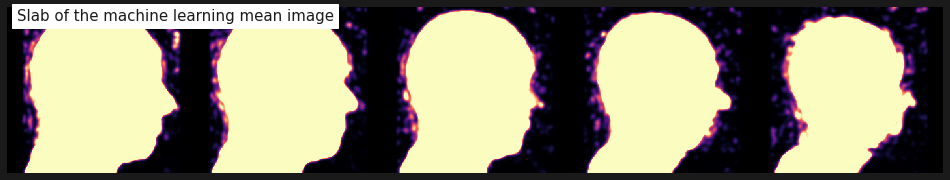